# ***Identifying Product Review Segments - EDA***

**Project Description:** This project aims to identify the key segmentations within a product's reviews.

**Project Goal:** The goal of this project is to better understand the different groupings of reviews received for a product and the size of each. Essentially we're looking to classify and understand trends in product reviews.

**File Description:** In this file we conduct initial exploration of the review dataset

**EDA Findings:**

*   Non-English reviews were removed rather than translated since there were so few of them
*   Reviews with a 0 sentiment score were removed as these were often nonsensical or only a few words.







# **File Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install langid
import langid
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

import io
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=fb0dd6355a79e7d7664fc0ba48ae6a5cf4538f6aaa066a0c2ca76b5678c002f2
  Stored in directory: /root/.cache/pip/wheels/32/6a/b6/b7eb43a6ad55b139c15c5daa29f3707659cfa6944d3c696f5b
Successfully built langid
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
   ━━

In [ ]:
reviews = pd.read_pickle('/content/drive/My Drive/shared_folder/reviews.pkl')

print(reviews.shape)

(359782, 15)


# **Exploration**

Null check

In [ ]:
reviews['review'].isnull().sum()

0

Language Check

In [ ]:
#Although the data has been filtered to english language games using the language column, there are still reviews in other languages
#note: It looks like some special characters have been corrupted so translation may throw errors
reviews[reviews['review'].str.contains('jeux')].head()

,app_id,app_name,review_id,language,review,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
4059,105600,Terraria,84331893,english,Ce jeux est vraiment genial on peut y etre cre...,1610161285,True,0,0,0.000000,0,True,3632.0,3382.0,249.0
116437,105600,Terraria,67488541,english,"C'est un trÃÂ¨s bon jeux, si je pouvais juste...",1587122044,True,1,0,0.517241,0,False,1958.0,18.0,724.0
160805,105600,Terraria,60506693,english,Je recommande ce jeu \nje joue sur un mac book...,1577261556,True,0,0,0.000000,0,True,906.0,0.0,721.0
200323,105600,Terraria,56375914,english,Un de mes jeux prÃÂ©fÃÂ©rÃÂ©s :)\n,1572773617,True,0,0,0.000000,0,True,20207.0,0.0,14884.0
228549,105600,Terraria,48971442,english,"Un excellent jeu, un peu addictif, bien constr...",1550074221,True,1,0,0.000000,0,False,81198.0,2.0,37825.0


Language Detection

In [ ]:
#Language detection function

def detect_language(text):
    try:
        return langid.classify(text)[0]
    except Exception as e:
        return 'unknown'

In [ ]:
#Data chunking function for language detection

def process_in_chunks(df, chunk_size=10000):
    languages = []
    for start in range(0, len(df), chunk_size):
        chunk = df.iloc[start:start + chunk_size]
        languages.extend(chunk['review'].map(detect_language))  # Apply language detection
    return languages

In [ ]:
reviews['language'] = process_in_chunks(reviews)

In [ ]:
#The language tagging took a while to run so lets save the results and re-load the results rather than run them again
reviews.to_pickle('/content/drive/My Drive/shared_folder/reviews_lang.pkl')

In [ ]:
reviews = pd.read_pickle('/content/drive/My Drive/shared_folder/reviews_lang.pkl')

In [ ]:
#These are correctly being picked up as french
reviews[reviews['review'].str.contains('jeux')].head()

,app_id,app_name,review_id,language,review,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
4059,105600,Terraria,84331893,fr,Ce jeux est vraiment genial on peut y etre cre...,1610161285,True,0,0,0.000000,0,True,3632.0,3382.0,249.0
116437,105600,Terraria,67488541,fr,"C'est un trÃÂ¨s bon jeux, si je pouvais juste...",1587122044,True,1,0,0.517241,0,False,1958.0,18.0,724.0
160805,105600,Terraria,60506693,fr,Je recommande ce jeu \nje joue sur un mac book...,1577261556,True,0,0,0.000000,0,True,906.0,0.0,721.0
200323,105600,Terraria,56375914,fr,Un de mes jeux prÃÂ©fÃÂ©rÃÂ©s :)\n,1572773617,True,0,0,0.000000,0,True,20207.0,0.0,14884.0
228549,105600,Terraria,48971442,fr,"Un excellent jeu, un peu addictif, bien constr...",1550074221,True,1,0,0.000000,0,False,81198.0,2.0,37825.0


In [ ]:
#Surprisingly it was able to classify every review, which is a bit suspicious
# The number of -non-engligh reviews is minimal so we won't go through it in too much detail
print(reviews['language'].value_counts(dropna=False).to_string())

language
en    332192
de      3126
nl      2737
it      2518
et      2117
fr      1894
es      1853
da      1660
qu      1182
eu      1071
pl       854
pt       826
sv       724
vi       581
fi       560
cy       512
mt       481
sl       480
id       417
lt       387
no       324
la       300
se       266
af       208
ro       197
lv       152
br       142
tl       132
cs       123
sq       118
ms       117
tr       115
ca       100
rw        98
xh        95
ga        87
nb        83
hu        81
mg        74
az        72
hr        70
sw        68
fo        65
nn        60
gl        52
an        51
sk        49
lo        49
lb        41
eo        35
ht        25
zh        23
vo        19
bs        19
jv        17
zu        17
is        15
ky         9
ar         8
wa         7
am         7
oc         4
ja         4
ug         3
hy         3
si         3
ku         2
ta         1


In [ ]:
#Over 90% of our reviews are in english
percentages = reviews['language'].value_counts(normalize=True, dropna=False)
print(percentages.round(4))

language
en    0.9131
de    0.0104
it    0.0082
nl    0.0078
et    0.0074
       ...  
ku    0.0000
hy    0.0000
ky    0.0000
si    0.0000
ug    0.0000
Name: proportion, Length: 66, dtype: float64


Given the large quantity and % of engligh reviews, we'll drop the non-english ones

In [ ]:
reviews = reviews[reviews['language'] == 'en']

# **Adding a Sentimentality Score**

In [ ]:
#Our data is very jargon heavy/informal so we'll use VADER (we dont have the capacity to run this with an ML Model bc of the size fo the data and small processing power currently available)
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#Given the size of the data, we'll run the sentiment analysis in batches
def get_vader_sentiment_batch(batch):
    return batch.apply(lambda review: analyzer.polarity_scores(review)['compound'])

# Batch size (e.g., 10,000 records at a time)
batch_size = 100000

In [ ]:
# Calculate sentiment score for the batches
sentiment_scores = []

for start in range(0, len(reviews), batch_size):
    end = min(start + batch_size, len(reviews))
    batch = reviews['review'].iloc[start:end]
    batch_sentiments = get_vader_sentiment_batch(batch)  # Get sentiments for the batch

    sentiment_scores.extend(batch_sentiments)  # Store the sentiment results

# Assign the sentiment scores to the df
reviews['sentiment_score'] = sentiment_scores

# Optional: Check the first few rows to verify
print(reviews[['review', 'sentiment_score']].head())

                                              review  sentiment_score
0  Very good and very addicting game! I recommend...           0.8594
1  i like everything about this game but i'm not ...          -0.7162
2  Its Gucci to all players seaking a god damn ch...          -0.0772
3  this game was my favorite and still is one of ...           0.7896
4                    Great game now give me awards\n           0.7964


In [ ]:
#This took some time so we're only going too run it once unless changes are made to the earlier file
reviews.to_pickle('/content/drive/My Drive/shared_folder/reviews_sentiment.pkl')

In [ ]:
reviews = pd.read_pickle('/content/drive/My Drive/shared_folder/reviews_sentiment.pkl')

Lets look at the sentiment split

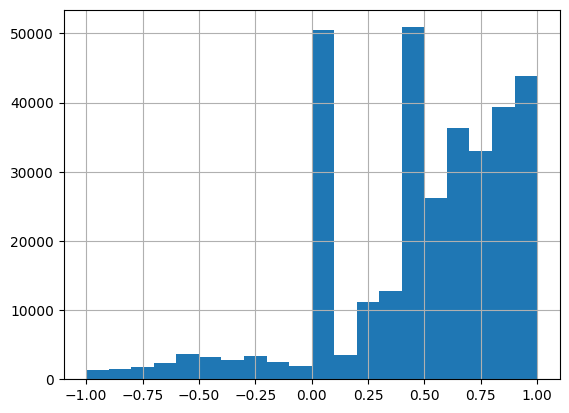

In [ ]:
#histgram of sentiment scores
hist = reviews['sentiment_score'].hist(bins=20)
plt.show()

#This spread is surprising. I expected to see distinct groups at both ends of the scale, but we're only getting that for positive reviews
#There is also a suspiciously large spike at 0

In [ ]:
#We can check the scores being assigned to reviews that recommended the game
print(reviews['recommended'].value_counts())
print(reviews['recommended'].value_counts(normalize=True))

#Surprisingly, a very large majority (98%!) of reviews recommend the game

recommended
True     325866
False      6326
Name: count, dtype: int64
recommended
True     0.980957
False    0.019043
Name: proportion, dtype: float64


In [ ]:
recommended_reviews = reviews[reviews['recommended'] == True]

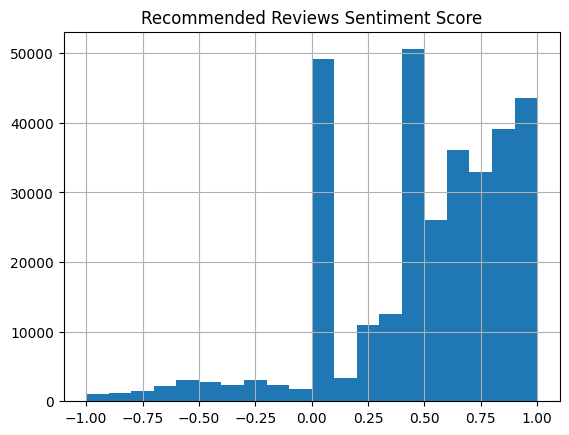

In [ ]:
hist = recommended_reviews['sentiment_score'].hist(bins=20)
plt.title('Recommended Reviews Sentiment Score')

plt.show()

In [ ]:
not_recommended_reviews = reviews[reviews['recommended'] == False]

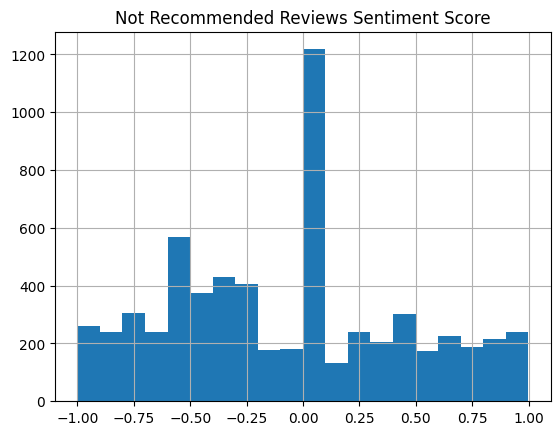

In [ ]:
hist = not_recommended_reviews['sentiment_score'].hist(bins=20)
plt.title('Not Recommended Reviews Sentiment Score')

plt.show()

#There is definitely a difference in the sentiment score based on recommended vs not, but it is not as big as expected
#The recommended reviews are very concentrated above 0, while the not recommended reviews slightly favour the negative sentiment score

Lets check out the big group of reviews with a sentiment score near 0

In [ ]:
reviews[reviews['sentiment_score'] == 0][['sentiment_score', 'review']].head(50)

#Some of these are valid and likely weren't scored bc of jargon, but some are nonsensical.
#These likely would not cluster well, so lets remove them

,sentiment_score,review
13,0.0,frost hydra sentries go brrrrr
19,0.0,gam
20,0.0,poggers
28,0.0,Too addicting\n
31,0.0,mence
32,0.0,yas\n
34,0.0,hec yeeeee
37,0.0,Its Terraria
38,0.0,pogger
52,0.0,it cull wery kool and veri ez.


In [ ]:
reviews[reviews['sentiment_score'] > 0.8][['sentiment_score', 'review']].head(20)
#These strongly rated reviews are much more cohesive and informative.
#Based on this, let's remove the 0 scored reviews

,sentiment_score,review
0,0.8594,Very good and very addicting game! I recommend...
10,0.9697,This game is very fun and I really enjoy it. I...
11,0.8074,its pretty great
18,0.8297,"In my opinion, terraria is a good game. I've o..."
36,0.9827,"Out of all the games I own, Terraria has to be..."
42,0.9684,"Honestly one of the best games every created, ..."
46,0.9246,An amazing game to keep you hooked and having ...
49,0.8684,Ive been playing this game since 2014 on mobil...
50,0.9200,I recommend this to others since this game has...
59,0.8625,"400 hours into a game. Take my word for it, th..."


In [ ]:
#The 0 score reviews are only 48k / 332k reviews, so we can likely remove with no issues
print('0 scored reviews: ', reviews[reviews['sentiment_score'] == 0]['app_id'].count())
print('all reviews: ', reviews['app_id'].count())

0 scored reviews:  48321
all reviews:  332192


In [ ]:
reviews = reviews[reviews['sentiment_score'] != 0]

In [ ]:
reviews.shape

(283871, 16)

In [ ]:
reviews.describe()

,app_id,review_id,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,sentiment_score
count,283871.0,2.838710e+05,2.838710e+05,283871.000000,2.838710e+05,283871.000000,283871.000000,2.838710e+05,283871.000000,2.837340e+05,283871.000000
mean,105600.0,4.980714e+07,1.541859e+09,0.884046,7.565042e+04,0.128353,0.117462,2.281080e+04,118.931906,1.428941e+04,0.552777
std,0.0,2.391731e+07,7.095294e+07,31.681218,1.802525e+07,0.222902,1.821937,3.241046e+04,567.180953,2.461745e+04,0.384904
min,105600.0,6.420000e+02,1.305651e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,-1.000000
25%,105600.0,2.749112e+07,1.498242e+09,0.000000,0.000000e+00,0.000000,0.000000,5.223000e+03,0.000000,1.858000e+03,0.440400
50%,105600.0,5.785879e+07,1.575680e+09,0.000000,0.000000e+00,0.000000,0.000000,1.325600e+04,0.000000,6.446000e+03,0.624900
75%,105600.0,6.931530e+07,1.590361e+09,0.000000,0.000000e+00,0.306049,0.000000,2.874200e+04,0.000000,1.716300e+04,0.833500
max,105600.0,8.521567e+07,1.611422e+09,9271.000000,4.294967e+09,0.982754,353.000000,2.433731e+06,20100.000000,1.670452e+06,1.000000


In [ ]:
#Check for nulls
reviews.info()

#There is one column will a couple of nulls. We can just remove these

<class 'pandas.core.frame.DataFrame'>
Index: 283871 entries, 0 to 360389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_id                          283871 non-null  int64  
 1   app_name                        283871 non-null  object 
 2   review_id                       283871 non-null  int64  
 3   language                        283871 non-null  object 
 4   review                          283871 non-null  object 
 5   timestamp_updated               283871 non-null  int64  
 6   recommended                     283871 non-null  bool   
 7   votes_helpful                   283871 non-null  int64  
 8   votes_funny                     283871 non-null  int64  
 9   weighted_vote_score             283871 non-null  float64
 10  comment_count                   283871 non-null  int64  
 11  steam_purchase                  283871 non-null  bool   
 12  author.playtime_forev

In [ ]:
reviews = reviews.dropna()

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283734 entries, 0 to 360389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_id                          283734 non-null  int64  
 1   app_name                        283734 non-null  object 
 2   review_id                       283734 non-null  int64  
 3   language                        283734 non-null  object 
 4   review                          283734 non-null  object 
 5   timestamp_updated               283734 non-null  int64  
 6   recommended                     283734 non-null  bool   
 7   votes_helpful                   283734 non-null  int64  
 8   votes_funny                     283734 non-null  int64  
 9   weighted_vote_score             283734 non-null  float64
 10  comment_count                   283734 non-null  int64  
 11  steam_purchase                  283734 non-null  bool   
 12  author.playtime_forev

In [ ]:
reviews.to_pickle('/content/drive/My Drive/shared_folder/adjusted_reviews.pkl')